In [44]:
#Importing the packages
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from scipy import stats as st

In [48]:
masterData = pd.read_csv('Backorder.csv')
masterData

,product_id,current_inventory,transit_duration,prior_sales_1_month,prior_sales_3_month,prior_sales_6_month,prior_sales_9_month,minimum_recommend_stock,source_has_issue,source_performance_6_months,source_performance_12_months,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,8.0,0.0,0.0,0.0,0.0,0.0,No,0.84,0.83,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,No,0.99,0.99,No,No,No,Yes,No,No
2,1043696,2.0,8.0,0.0,0.0,0.0,0.0,0.0,No,0.84,0.83,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,1.0,No,0.10,0.13,No,No,No,Yes,No,No
4,1044048,8.0,8.0,0.0,0.0,0.0,4.0,2.0,No,0.84,0.83,Yes,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1639729,1407754,0.0,2.0,0.0,5.0,7.0,7.0,0.0,No,0.69,0.69,Yes,No,No,Yes,No,No
1639730,1373987,-1.0,8.0,1.0,3.0,3.0,8.0,0.0,No,0.84,0.83,No,No,No,Yes,No,No
1639731,1524346,-1.0,9.0,0.0,8.0,11.0,12.0,0.0,No,0.86,0.84,Yes,No,No,No,No,Yes
1639732,1439563,62.0,9.0,35.0,63.0,153.0,205.0,12.0,No,0.86,0.84,No,No,No,Yes,No,No


In [3]:
masterData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1639734 entries, 0 to 1639733
Data columns (total 17 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   product_id                    1639734 non-null  int64  
 1   current_inventory             1639734 non-null  float64
 2   transit_duration              1639734 non-null  float64
 3   prior_sales_1_month           1639734 non-null  float64
 4   prior_sales_3_month           1639734 non-null  float64
 5   prior_sales_6_month           1639734 non-null  float64
 6   prior_sales_9_month           1639734 non-null  float64
 7   minimum_recommend_stock       1639734 non-null  float64
 8   source_has_issue              1639734 non-null  object 
 9   source_performance_6_months   1639734 non-null  float64
 10  source_performance_12_months  1639734 non-null  float64
 11  deck_risk                     1639734 non-null  object 
 12  oe_constraint               

In [4]:
masterData = masterData.drop(['oe_constraint', 'rev_stop', 'source_has_issue'], axis = 1)

In [5]:
masterData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1639734 entries, 0 to 1639733
Data columns (total 14 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   product_id                    1639734 non-null  int64  
 1   current_inventory             1639734 non-null  float64
 2   transit_duration              1639734 non-null  float64
 3   prior_sales_1_month           1639734 non-null  float64
 4   prior_sales_3_month           1639734 non-null  float64
 5   prior_sales_6_month           1639734 non-null  float64
 6   prior_sales_9_month           1639734 non-null  float64
 7   minimum_recommend_stock       1639734 non-null  float64
 8   source_performance_6_months   1639734 non-null  float64
 9   source_performance_12_months  1639734 non-null  float64
 10  deck_risk                     1639734 non-null  object 
 11  ppap_risk                     1639734 non-null  object 
 12  stop_auto_buy               

In [6]:
subset_masterData = masterData.sample(5000)
sourceperf_corr_df = subset_masterData[['source_performance_6_months', 'source_performance_12_months']]
sourceperf_corr = sourceperf_corr_df.corr()
sourceperf_corr

,source_performance_6_months,source_performance_12_months
source_performance_6_months,1.000000,0.942395
source_performance_12_months,0.942395,1.000000


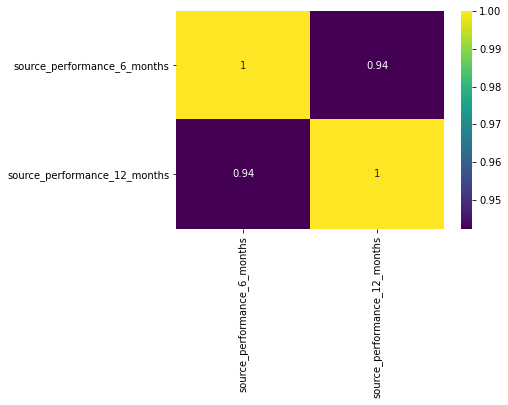

In [55]:
corr_plot = sns.heatmap(sourceperf_corr, annot = True,cmap='viridis')
corr_plot.figure.savefig('corr1.png', dpi=500,bbox_inches='tight')

C:\Users\sabbe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


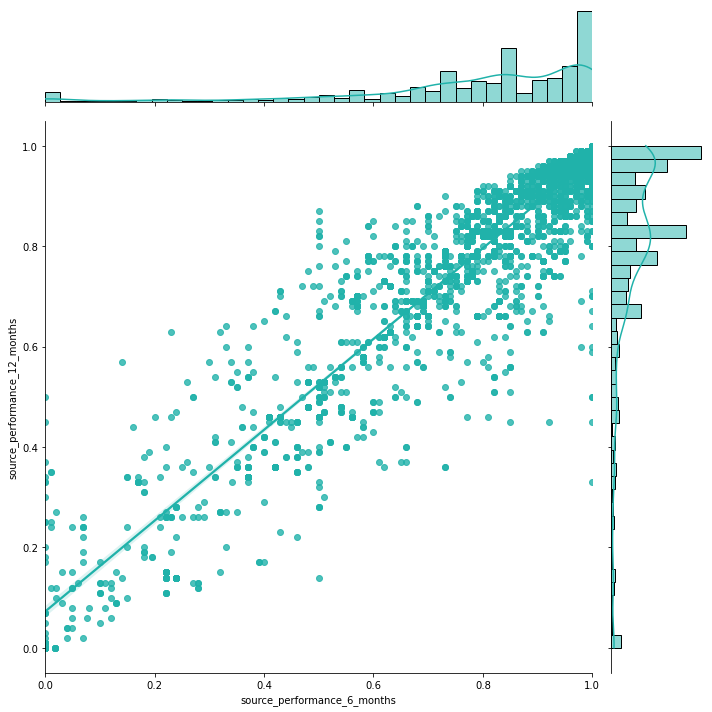

In [57]:
scattered_plot = sns.jointplot('source_performance_6_months', 'source_performance_12_months', data = subset_masterData, kind = 'reg',color='lightseagreen', height=10)
scattered_plot.savefig('corr111.png', dpi=500)

We can see that the expected performance over 6 and 12 months periods are highly correlated

In [52]:
prior_sales_corr_df = subset_masterData[['prior_sales_1_month', 'prior_sales_3_month', 'prior_sales_6_month',
                                        'prior_sales_9_month']]
prior_sales_corr = prior_sales_corr_df.corr()
prior_sales_corr

,prior_sales_1_month,prior_sales_3_month,prior_sales_6_month,prior_sales_9_month
prior_sales_1_month,1.000000,0.995058,0.990224,0.988706
prior_sales_3_month,0.995058,1.000000,0.998269,0.996859
prior_sales_6_month,0.990224,0.998269,1.000000,0.999128
prior_sales_9_month,0.988706,0.996859,0.999128,1.000000


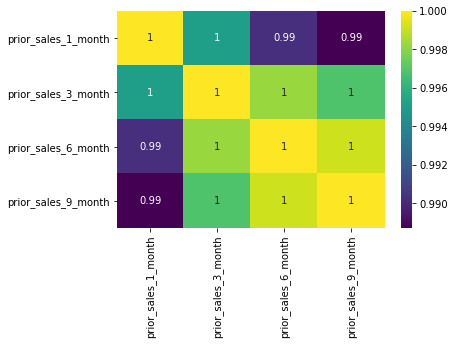

In [58]:
corr_plot_2 = sns.heatmap(prior_sales_corr, annot = True,cmap='viridis')
corr_plot_2.figure.savefig('corr22.png', dpi=500,bbox_inches='tight')

C:\Users\sabbe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


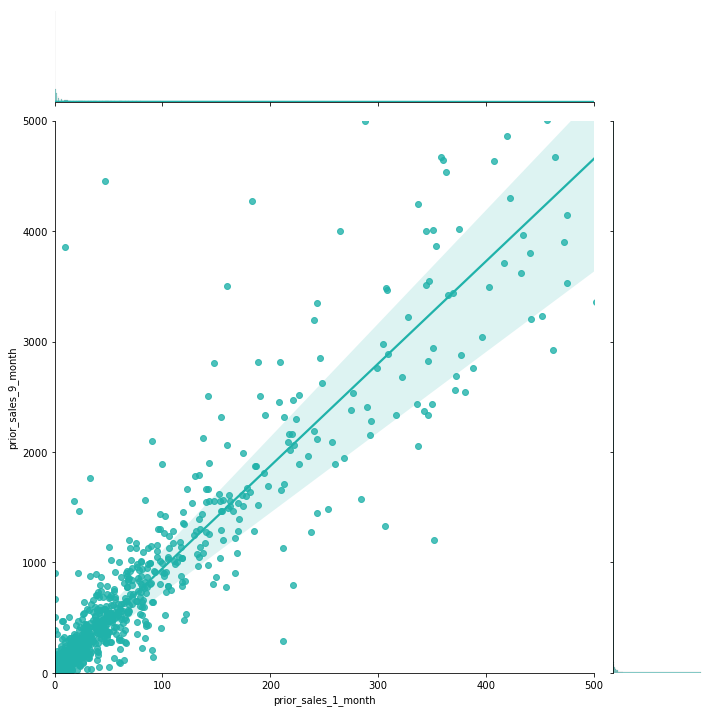

In [59]:
prior_sales_scatter_plot = sns.jointplot('prior_sales_1_month', 'prior_sales_9_month', data = subset_masterData,color='lightseagreen', kind = 'reg', xlim = (0,500), ylim = (0,5000), height=10)
prior_sales_scatter_plot.savefig('corr222.png', dpi=500)

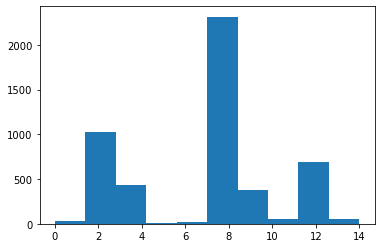

In [25]:
bar_plot = plt.hist(subset_masterData.transit_duration)

Observation: It can be clearly seen that most of the transit_duration is in between 2-24 with the highest peak transition 
    is for 8 weeks windows followed by 2 weeks and 12 weeks window.

<AxesSubplot:xlabel='went_on_backorder', ylabel='transit_duration'>

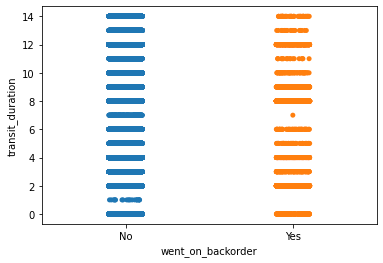

In [27]:
sns.stripplot(x = 'went_on_backorder', y = 'transit_duration', data = masterData, jitter = True)

<AxesSubplot:xlabel='went_on_backorder', ylabel='transit_duration'>

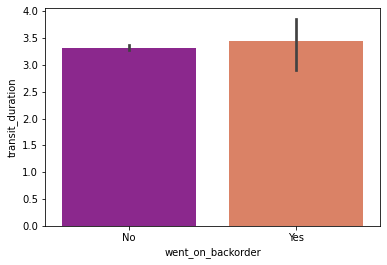

In [28]:
sns.barplot(x ='went_on_backorder', y ='transit_duration', data = subset_masterData,
            palette ='plasma', estimator = np.std)

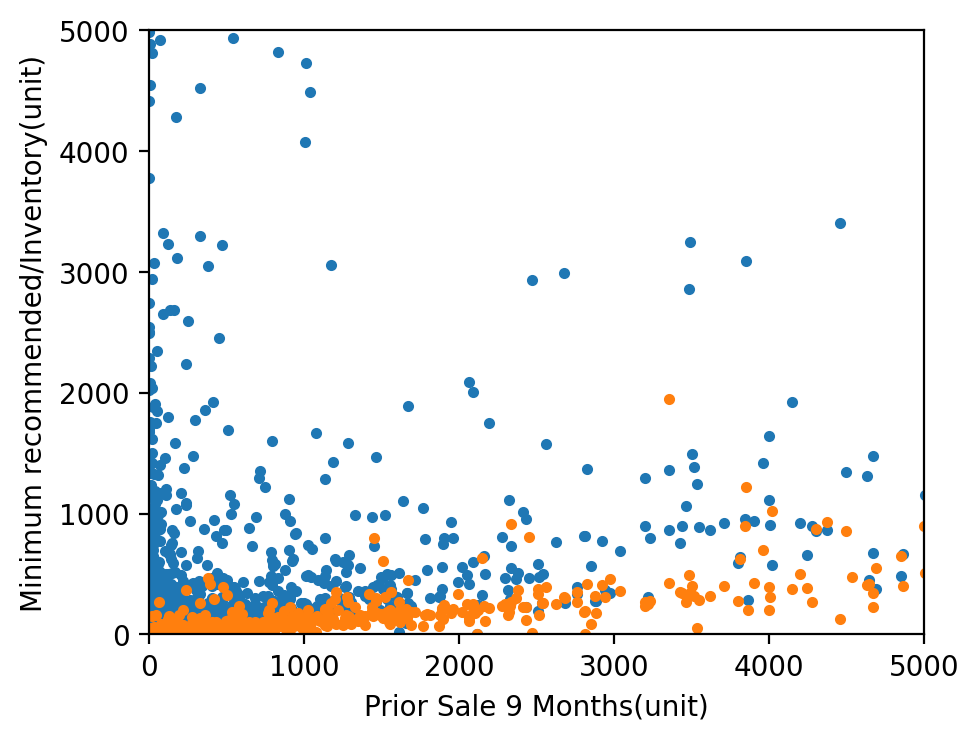

In [62]:
plt.figure(figsize=(5,4),dpi=200)

plt.plot(subset_masterData.prior_sales_9_month, subset_masterData.current_inventory, marker = '.', linestyle = 'None' )
plt.xlabel('Prior Sale 9 Months(unit)')
plt.ylabel('Current Inventory(unit)')
plt.plot(subset_masterData.prior_sales_9_month, subset_masterData.minimum_recommend_stock, marker = '.', linestyle = 'None' )
plt.xlabel('Prior Sale 9 Months(unit)')
plt.ylabel('Minimum recommended/Inventory(unit)')
plt.xlim(0,5000)
plt.ylim(0,5000)

Here there are couples of observations can be drawn:
    
    1. There are few sku's wherein the current inventory is high as 1.4 million even when there are no prior 9 months sale.
    
    2. Similarly, the recommended the stock for few skus are high as 150k+ even when there are no prior 9 months sale for these products
    
This is an interesting obeservation can be presented to the client, this could probably might be data issue.

C:\Users\sabbe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sabbe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sabbe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='deck_risk', ylabel='count'>

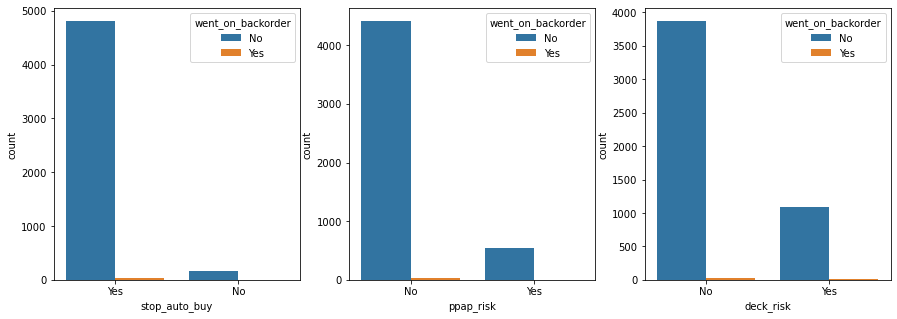

In [37]:
fig, ax = plt.subplots(ncols = 3, figsize=(15, 5))
sns.countplot('stop_auto_buy', hue = 'went_on_backorder', data = subset_masterData, ax = ax[0])
sns.countplot('ppap_risk', hue = 'went_on_backorder', data = subset_masterData, ax = ax[1])
sns.countplot('deck_risk', hue = 'went_on_backorder', data = subset_masterData, ax = ax[2])

In [38]:
masterData['deck_risk_n'] = masterData.deck_risk.map({'Yes':1, 'No':0})
masterData['ppap_risk_n'] = masterData.ppap_risk.map({'Yes':1, 'No':0})
masterData['stop_auto_buy_n'] = masterData.stop_auto_buy.map({'Yes':1, 'No':0})

In [39]:
subset_masterData['deck_risk_n'] = subset_masterData.deck_risk.map({'Yes':1, 'No':0})
subset_masterData['ppap_risk_n'] = subset_masterData.ppap_risk.map({'Yes':1, 'No':0})
subset_masterData['stop_auto_buy_n'] = subset_masterData.stop_auto_buy.map({'Yes':1, 'No':0})

Realtionship with deck_risk, ppap_risk and stop_auto_buy with the outcome variable went_backorder

Inorder to further understand the relationship between the categorical variable with the outcome variable, we can
start using the crosstabulation and chi-square test.

Ho ----> Feature are independent, no association between the variables exists

H1 ----> Feature are not independent; there is an association between the variable exists.

In [40]:
#deck_risk relation with the backorders
contingency_table_deck_risk = pd.crosstab(masterData.deck_risk, masterData.went_on_backorder)
contingency_table_deck_risk.columns = ['No', 'Yes']
contingency_table_deck_risk.index = ['No', 'Yes']
contingency_table_deck_risk

,No,Yes
No,1273264,9299
Yes,355282,1889


In [41]:
#ppap_risk relation with the backorders
contingency_table_ppap_risk = pd.crosstab(masterData.ppap_risk, masterData.went_on_backorder)
contingency_table_ppap_risk.columns = ['No', 'Yes']
contingency_table_ppap_risk.index = ['No', 'Yes']
contingency_table_ppap_risk

,No,Yes
No,1434423,9447
Yes,194123,1741


In [42]:
#stop_auto_buy relation with the backorders
contingency_table_stop_auto_buy = pd.crosstab(masterData.stop_auto_buy, masterData.went_on_backorder)
contingency_table_stop_auto_buy.columns = ['No', 'Yes']
contingency_table_stop_auto_buy.index = ['No', 'Yes']
contingency_table_stop_auto_buy

,No,Yes
No,46977,444
Yes,1581569,10744


In [45]:
#Chi-square test for the deck_risk
chi_deck_risk, p_val_deck_risk, dof_deck_risk, exp_deck_risk = st.chi2_contingency(contingency_table_deck_risk)
chi2_critical = st.chi2.ppf(q = 0.95, df = dof_deck_risk)
print('Chi-Square Critical value:', chi2_critical)
print('chi_deck_risk:', chi_deck_risk)
print('p_val_deck_risk',p_val_deck_risk)
print('degree of freedom', dof_deck_risk)

Chi-Square Critical value: 3.841458820694124
chi_deck_risk: 158.33558932833364
p_val_deck_risk 2.6140480466303405e-36
degree of freedom 1


In [46]:
#Chi-square test for ppap_risk
chi_ppap_risk, p_val_ppap_risk, dof_ppap_risk, exp_ppap_risk = st.chi2_contingency(contingency_table_ppap_risk)
chi2_critical = st.chi2.ppf(q = 0.95, df = dof_ppap_risk)
print('Chi-Square Critical value:', chi2_critical)
print('chi_ppap_risk:', chi_ppap_risk)
print('p_val_ppap_risk',p_val_ppap_risk)
print('degree of freedom', dof_ppap_risk)

Chi-Square Critical value: 3.841458820694124
chi_ppap_risk: 139.72726876786075
p_val_ppap_risk 3.0538954261451925e-32
degree of freedom 1


In [47]:
#Chi-square test for stop_auto_buy
chi_stop_auto_buy, p_val_stop_auto_buy, dof_stop_auto_buy, exp_stop_auto_buy = st.chi2_contingency(contingency_table_stop_auto_buy)
chi2_critical = st.chi2.ppf(q = 0.95, df = dof_stop_auto_buy)
print('Chi-Square Critical value:', chi2_critical)
print('chi_stop_auto_buy:', chi_stop_auto_buy)
print('p_val_stop_auto_buy',p_val_stop_auto_buy)
print('degree of freedom', dof_stop_auto_buy)

Chi-Square Critical value: 3.841458820694124
chi_stop_auto_buy: 46.102446623300395
p_val_stop_auto_buy 1.1222821596399783e-11
degree of freedom 1


We used crosstabulation and chi-square to find the relation between target variable with other categorical variables. All the relations has p-values is less than 0.05 and we also have chi-square calculated value is greater than the chi-square critical value. Based on these two evidence we can reject the null hypothesis and can go with the alternate hypothesis.

Here we can say that went_on_backorder is related to deck_risk,ppap_risk and stop_auto_buy, so we will keep all these features for modeling